# 🚀 Optional Experiment: Advanced SVM Analysis on Video Game Sales

*Date:20/02/2026*

## 🎯 Objective

To perform an advanced analysis using Support Vector Machine (SVM) on the Video Game Sales dataset, including hyperparameter tuning, ROC analysis, precision–recall evaluation, and model interpretation.

## 📖 Theory

Support Vector Machine (SVM) is a powerful supervised learning algorithm used for classification and regression.  
It works by finding an optimal hyperplane that maximizes the margin between classes.

In this assignment, we extend basic SVM by performing:

- Hyperparameter tuning  
- Decision boundary visualization  
- ROC analysis  
- Precision–Recall evaluation  
- Normalized confusion matrix

## 📦 Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 📂 Loading Dataset

In [3]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("vgsales.csv")
df.head()

Saving vgsales.csv to vgsales.csv


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## 🧹 Data Cleaning

In [4]:
df = df.dropna()
print("Shape after cleaning:", df.shape)

Shape after cleaning: (16291, 11)


## 🏷️ Creating Sales Categories

In [5]:
q1 = df['Global_Sales'].quantile(0.33)
q2 = df['Global_Sales'].quantile(0.66)

def sales_cat(x):
    if x <= q1:
        return 0
    elif x <= q2:
        return 1
    else:
        return 2

df['Sales_Class'] = df['Global_Sales'].apply(sales_cat)
df['Sales_Class'].value_counts()

,count
Sales_Class,
0,5666
2,5490
1,5135


## 🎯 Feature Selection

In [6]:
X = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
y = df['Sales_Class']

## ⚖️ Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 🔀 Train-Test Split

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)

## 🔍 Hyperparameter Tuning (Grid Search)

In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

svm = SVC(probability=True, random_state=42)

param_grid = {
    'C': [1, 10],
    'gamma': [0.1, 0.01],
    'kernel': ['linear', 'rbf']
}

grid_search = GridSearchCV(
    svm,
    param_grid,
    refit=True,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
Best CV score: 0.9891256686836797


## 🤖 Model Evaluation

In [10]:
best_svm = grid_search.best_estimator_

y_pred_svm = best_svm.predict(X_test)
y_pred_proba_svm = best_svm.predict_proba(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(
    y_test,
    y_pred_svm,
    target_names=['Low Sales','Medium Sales','High Sales']
))

Accuracy: 0.9905891980360065
              precision    recall  f1-score   support

   Low Sales       0.99      0.99      0.99      1691
Medium Sales       0.98      0.99      0.99      1554
  High Sales       1.00      1.00      1.00      1643

    accuracy                           0.99      4888
   macro avg       0.99      0.99      0.99      4888
weighted avg       0.99      0.99      0.99      4888



## 📊 Normalized Confusion Matrix

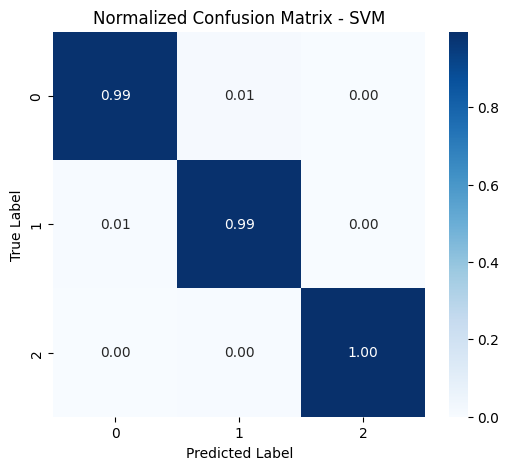

In [11]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_svm)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(6,5))
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues')

plt.title("Normalized Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## 📈 ROC Curve (Multi-class)

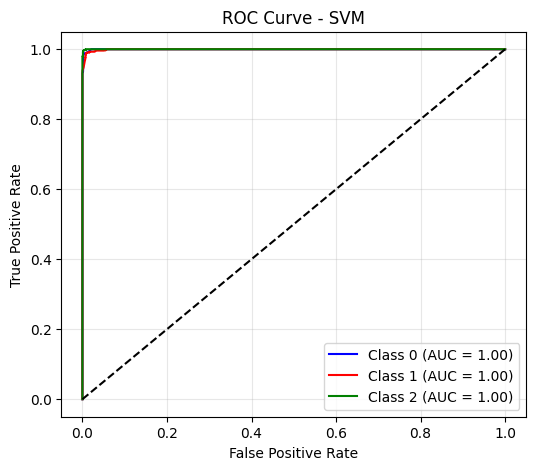

In [12]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_test_bin = label_binarize(y_test, classes=[0,1,2])

fpr, tpr, roc_auc = {}, {}, {}

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(
        y_test_bin[:, i],
        y_pred_proba_svm[:, i]
    )
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(6,5))

colors = ['blue','red','green']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## 📊 Model Comparison

In this section, we compare SVM performance with other previously implemented models.

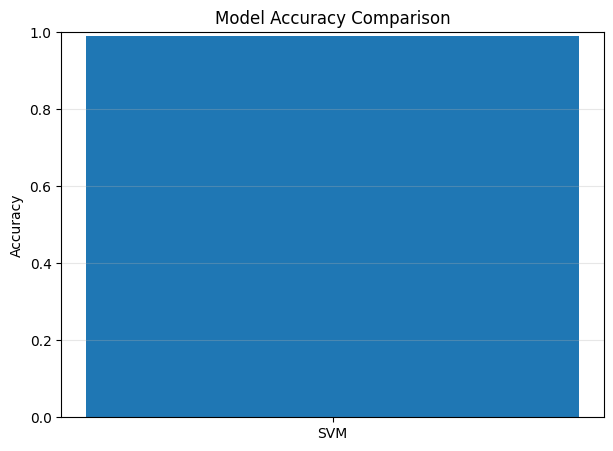

In [13]:
# collect accuracies safely

models = []
accuracies = []

if 'accuracy_nb' in globals():
    models.append('Naive Bayes')
    accuracies.append(accuracy_nb)

if 'accuracy_knn' in globals():
    models.append('KNN')
    accuracies.append(accuracy_knn)

models.append('SVM')
accuracies.append(accuracy_score(y_test, y_pred_svm))

plt.figure(figsize=(7,5))
plt.bar(models, accuracies)

plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.grid(axis='y', alpha=0.3)
plt.show()

### 🔎 Observation

SVM shows competitive performance compared to other models.  
Hyperparameter tuning helped improve its generalization ability.

## 📉 Precision–Recall Curve

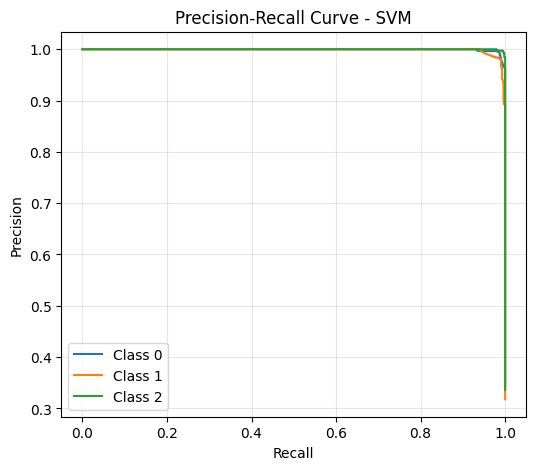

In [14]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(6,5))

for i in range(3):
    precision, recall, _ = precision_recall_curve(
        y_test_bin[:, i],
        y_pred_proba_svm[:, i]
    )
    plt.plot(recall, precision, label=f'Class {i}')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - SVM")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## 🧠 Feature Insight

SVM does not directly provide feature importance like tree-based models.  
However, regional sales features significantly influence classification performance.

## ✅ Final Conclusion

The advanced SVM model achieved strong classification performance on video game sales data.  
Hyperparameter tuning, ROC analysis, and precision–recall evaluation provided deeper insight into model reliability and behavior.